# DATA SOURCES

In [2]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
dfj=pd.read_json("/content/drive/MyDrive/Colab Notebooks/Data/Rates.json")

**DATA STRUCTURES**

In [4]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, AT to SK
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   last_updated  27 non-null     object
 1   disclaimer    27 non-null     object
 2   rates         27 non-null     object
dtypes: object(3)
memory usage: 864.0+ bytes


In [9]:
LU= dfj.last_updated
LU

AT    2021-05-27T01:20Z
BE    2021-05-27T01:20Z
BG    2021-05-27T01:20Z
CY    2021-05-27T01:20Z
CZ    2021-05-27T01:20Z
DE    2021-05-27T01:20Z
DK    2021-05-27T01:20Z
EE    2021-05-27T01:20Z
ES    2021-05-27T01:20Z
FI    2021-05-27T01:20Z
FR    2021-05-27T01:20Z
GR    2021-05-27T01:20Z
HR    2021-05-27T01:20Z
HU    2021-05-27T01:20Z
IE    2021-05-27T01:20Z
IT    2021-05-27T01:20Z
LT    2021-05-27T01:20Z
LU    2021-05-27T01:20Z
LV    2021-05-27T01:20Z
MT    2021-05-27T01:20Z
NL    2021-05-27T01:20Z
PL    2021-05-27T01:20Z
PT    2021-05-27T01:20Z
RO    2021-05-27T01:20Z
SE    2021-05-27T01:20Z
SI    2021-05-27T01:20Z
SK    2021-05-27T01:20Z
Name: last_updated, dtype: object

In [10]:
type(LU)

pandas.core.series.Series

In [ ]:
dfj.head()


In [ ]:
dfj.columns

**## INDEX: Row numbers and Row names**

In [ ]:
dfj.index

In [ ]:
dfj.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/Rates.xlsx")

In [ ]:
def addcolumns(r):
  Country = r["rates"]
  r["Country"]= Country["country"] 
  r["Vat_name"]= Country["vat_name"] 
  r["Vat_abbr"]= Country["vat_abbr"] 
  r["Standard_rate"]= Country["standard_rate"] 
  r["Reduced_rate_alt"]= Country["reduced_rate_alt"] 
  r["Super_reduced"]= Country["super_reduced_rate"] 
  r["Parking_rate"]= Country["parking_rate"]
  return r

In [ ]:
ndfj= dfj.apply(addcolumns,axis=1)

In [ ]:
ndfj.info()

In [ ]:
ndfj.columns

In [ ]:
ndfj.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/RatesOut1.xlsx")

In [ ]:
df2 = pd.DataFrame(ndfj,
columns=['Country', 'Vat_abbr', 'Standard_rate'])

In [ ]:
df2.sort_values(by='Standard_rate',ascending = False)

In [ ]:
print (ndfj)

In [ ]:
churn_ind = df2.set_index("Standard_rate")
print(churn_ind( drop=True ).head())

**STATISTICS**

In [ ]:
df3 = pd.DataFrame(ndfj,
columns=['Standard_rate'])


In [ ]:
df2.describe()

In [ ]:
df3.median()

In [ ]:
ndfj.hist(column='Standard_rate')

In [ ]:
ax = ndfj.plot.kde()


In [ ]:
ax = ndfj.plot.scatter(x='Standard_rate', y='Country')

##TASK 1. Most common standard rate 
 



In [ ]:
df3.mode()

In [ ]:
df4 = pd.DataFrame(ndfj,
columns=['Country','Standard_rate'])

In [ ]:
df3.mean()

In [ ]:
df4.mean(axis = 1)

In [ ]:
df5= df3.mean()+df3.mean()*0.20

In [ ]:
df5

In [ ]:
df4['Standard_rate'] > 26

In [ ]:
df7 = df4[df4['Standard_rate'] > 25.8]

**Countries 20% above the average of standard VAT rate**

---



In [ ]:
df7

In [ ]:
ax = ndfj.plot.scatter(x='Standard_rate', y='Reduced_rate_alt')

In [ ]:
ndfj.plot.scatter(x='Standard_rate', 
                  y='Reduced_rate_alt', 
                  cmap='viridis')

In [ ]:
# set seed for reproducing
np.random.seed(42)
n = 5000
mean_mu1 = 60
sd_sigma1 = 15
data1 = np.random.normal(mean_mu1, sd_sigma1, n)
mean_mu2 = 80
sd_sigma2 = 15
data2 = np.random.normal(mean_mu2, sd_sigma2, n)

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(ndfj, bins=100, alpha=0.5, label="Standard_rate")
plt.hist(ndfj, bins=100, alpha=0.5, label="Reduced_rate_alt")

In [ ]:
df2_wide=ndfj.pivot(columns='Reduced_rate_alt', values='Standard_rate')
df2_wide.head(n=3)

In [ ]:
df2_wide.plot.hist(bins=100, figsize=(8,6), alpha=0.7)

In [ ]:
df2.values

**ARCHITECTURE FRAMEWORK**

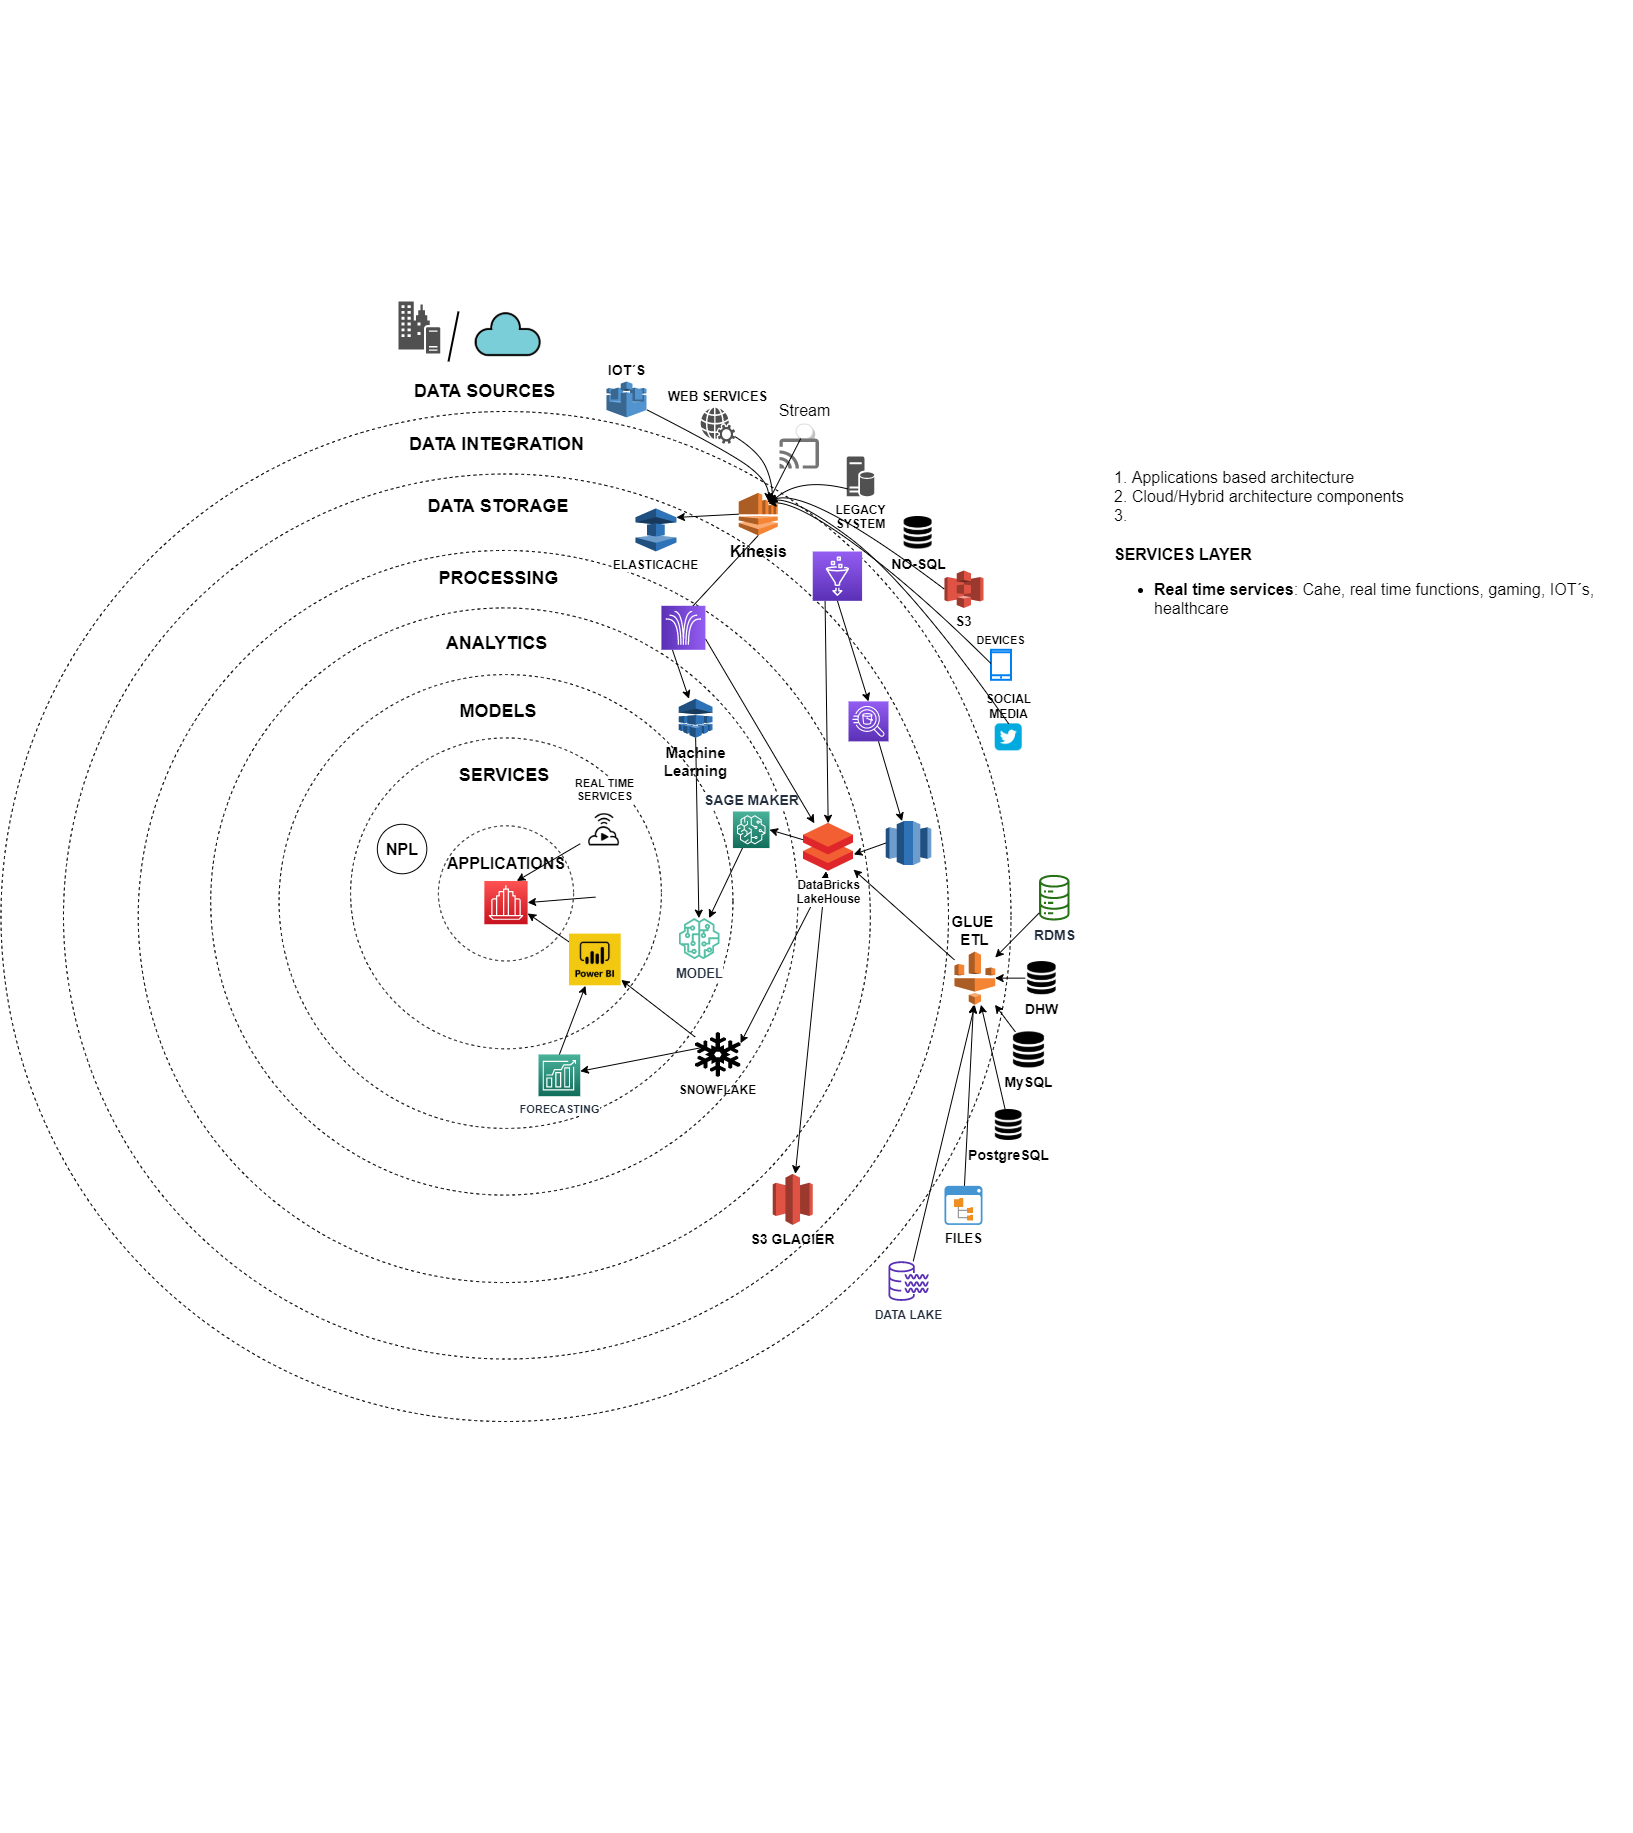